In [1]:
import numpy as np
import matplotlib.pyplot as plt

import theano
theano.config.blas.ldflags = ''
print(theano.config.blas.ldflags)

# from pymc3 import Model, Beta, Binomial, Normal
import pymc3 as pm
import scipy as sp

%matplotlib inline

In [2]:
n_1, n_2 = 10, 10
k_1, k_2 = 5, 7
model = pm.Model()
with model:
    theta_1 = pm.Beta('theta_1', 1, 1)
    theta_2 = pm.Beta('theta_2', 1, 1)
    
    delta = pm.Deterministic('delta', theta_1 - theta_2)
    
    k_1_obs = pm.Binomial('k_1_obs', n_1, theta_1, observed=k_1)
    k_2_obs = pm.Binomial('k_2_obs', n_2, theta_2, observed=k_2)

Applied logodds-transform to theta_1 and added transformed theta_1_logodds to model.
Applied logodds-transform to theta_2 and added transformed theta_2_logodds to model.


In [3]:
map_estimate = pm.find_MAP(model=model)
print(map_estimate)

{'theta_2_logodds': array(0.6931467196172956), 'theta_1_logodds': array(0.0)}


In [4]:
# DEFINE THE MODEL
with model:
    
    # obtain starting values via MAP
    start = pm.find_MAP(fmin=sp.optimize.fmin_powell)
    
    # draw N posterior samples
    N = 30000
    trace = pm.sample(N, start=start)

Assigned NUTS to theta_1_logodds
Assigned NUTS to theta_2_logodds
 [-----------------100%-----------------] 30000 of 30000 complete in 18.9 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11637f7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118842be0>]], dtype=object)

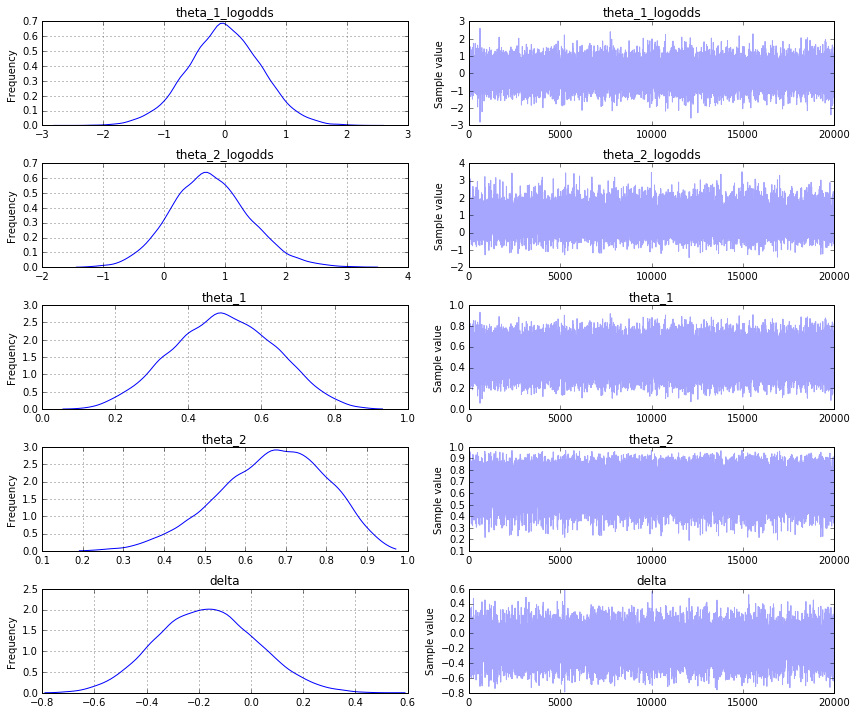

In [5]:
pm.traceplot(trace[10000:])

In [21]:
pm.summary(trace[10000:], alpha=0.05)


theta_1_logodds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.008           0.607            0.004            [-1.220, 1.179]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.218         -0.409         -0.013         0.397          1.182


theta_2_logodds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.763            0.653            0.005            [-0.534, 2.036]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.461         0.316          0.733          1.176          2.133


theta_1:

  Mean             SD               MC Error         95% HPD interval
  -

/Users/mjdillon/anaconda/envs/pymc3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6a4748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c6ea748>]], dtype=object)

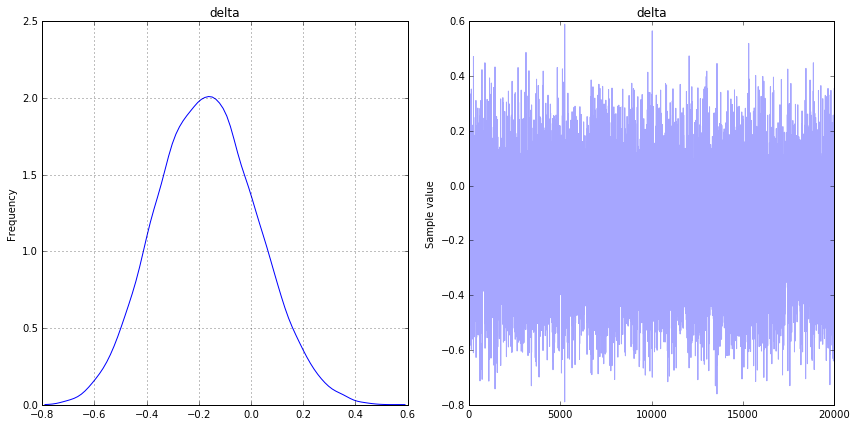

In [20]:
pm.traceplot(trace[10000:], varnames=['delta'], figsize=(12,6))